In [14]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
gssdata = pd.read_csv('https://raw.githubusercontent.com/cs109/a-2017/master/Labs/Lab7_Logistic_ROC_Imputation/gssdata4.csv')
gssdata.head()

,health,age,sex,educ,sexornt,partyid,race,married,income
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0
2,good,59,male,13,heterosexual or straight,rep,white,1,NaN
3,excellent,74,female,17,heterosexual or straight,other,white,1,NaN
4,poor,37,female,10,heterosexual or straight,other,white,0,NaN


In [15]:
warnings.simplefilter('ignore')

In [3]:
gssdata.health.value_counts()

good         737
excellent    414
fair         301
poor          99
Name: health, dtype: int64

In [4]:
poorhealth = np.where(gssdata.health == 'poor',1,0)
goodhealth = np.where(gssdata.health == 'good',1,0)
excellenthealth = np.where(gssdata.health == 'excellent',1,0) 
fairhealth = np.where(gssdata.health == 'fair',1,0) 

In [5]:
np.sum(fairhealth)

301

In [6]:
gssdata['poorhealth'] = poorhealth
gssdata['fairhealth'] = fairhealth
gssdata['excellenthealth'] = excellenthealth
100*gssdata.poorhealth.mean()

6.382978723404255

In [7]:
#creating dummies two ways
gssdata['female'] = 1*(gssdata['sex'] ==  'female')
dummy_vars = pd.get_dummies(gssdata[['sexornt','partyid','race']])
gssdata = gssdata.join(dummy_vars)

In [8]:
print(gssdata.shape)
gssdata.head()

(1551, 23)


,health,age,sex,educ,sexornt,partyid,race,married,income,poorhealth,...,sexornt_bisexual,sexornt_dont know,sexornt_heterosexual or straight,sexornt_homosexual or gay,partyid_dem,partyid_other,partyid_rep,race_black,race_other,race_white
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0,0,...,0,0,1,0,0,0,1,0,0,1
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0,0,...,0,0,1,0,0,0,1,0,0,1
2,good,59,male,13,heterosexual or straight,rep,white,1,NaN,0,...,0,0,1,0,0,0,1,0,0,1
3,excellent,74,female,17,heterosexual or straight,other,white,1,NaN,0,...,0,0,1,0,0,1,0,0,0,1
4,poor,37,female,10,heterosexual or straight,other,white,0,NaN,1,...,0,0,1,0,0,1,0,0,0,1


In [10]:
gssdata_full = gssdata.dropna(how='any')
print(gssdata_full.shape)
print(100*gssdata_full.poorhealth.mean())
gssdata_full.head()

(963, 23)
1.6614745586708204


,health,age,sex,educ,sexornt,partyid,race,married,income,poorhealth,...,sexornt_bisexual,sexornt_dont know,sexornt_heterosexual or straight,sexornt_homosexual or gay,partyid_dem,partyid_other,partyid_rep,race_black,race_other,race_white
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0,0,...,0,0,1,0,0,0,1,0,0,1
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0,0,...,0,0,1,0,0,0,1,0,0,1
5,excellent,30,female,15,heterosexual or straight,other,other,1,18750.0,0,...,0,0,1,0,0,1,0,0,1,0
9,excellent,30,female,14,heterosexual or straight,other,black,1,16250.0,0,...,0,0,1,0,0,1,0,1,0,0
12,good,38,female,15,heterosexual or straight,dem,white,0,18750.0,0,...,0,0,1,0,1,0,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(range(gssdata_full.shape[0]), train_size=0.50)
#gsstemp = gssdata_full.drop(['health','fairhealth','goodhealth','excellenthealth','sex','sexornt','partyid','race'],axis=1)
gsstemp = gssdata_full[['age','educ','female','partyid_dem','partyid_rep','income']]
X_train = gsstemp.iloc[itrain, :]
X_test = gsstemp.iloc[itest, :]
y_train = gssdata_full['poorhealth'].iloc[itrain]
y_test = gssdata_full['poorhealth'].iloc[itest]

y_train.shape, X_train.shape, y_test.shape, X_test.shape

((481,), (481, 6), (482,), (482, 6))

In [85]:
logit = LogisticRegression(C=1000000)
logit.fit(X_train, y_train) 
print(logit.score(X_test,y_test))

0.9896265560165975


In [17]:
from sklearn.metrics import confusion_matrix

[[477   0]
 [  5   0]]


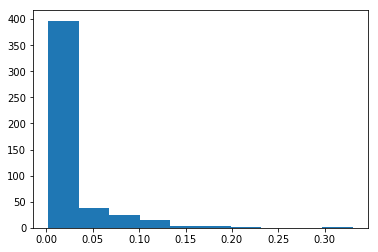

In [86]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,logit.predict(X_test)))
yhats = logit.predict_proba(X_train)
hist = plt.hist(yhats[:,1])

In [24]:
confusion_matrix(y_test,logit.predict(X_test))

array([[477,   0],
       [  5,   0]], dtype=int64)

In [38]:
yhats = logit.predict_proba(X_train)[:,1]

In [43]:
confusion_matrix(y_train,yhats>0.06)

array([[423,  47],
       [  6,   5]], dtype=int64)

In [87]:
def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

In [88]:
print(confusion_matrix(y_test,t_repredict(logit, 0.06, X_test)))
print(confusion_matrix(y_train,t_repredict(logit, 0.06, X_train)))

[[440  37]
 [  5   0]]
[[423  47]
 [  6   5]]


In [49]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds=roc_curve(y_train, logit.predict_proba(X_train)[:,1])

Text(0.5,1,'ROC')

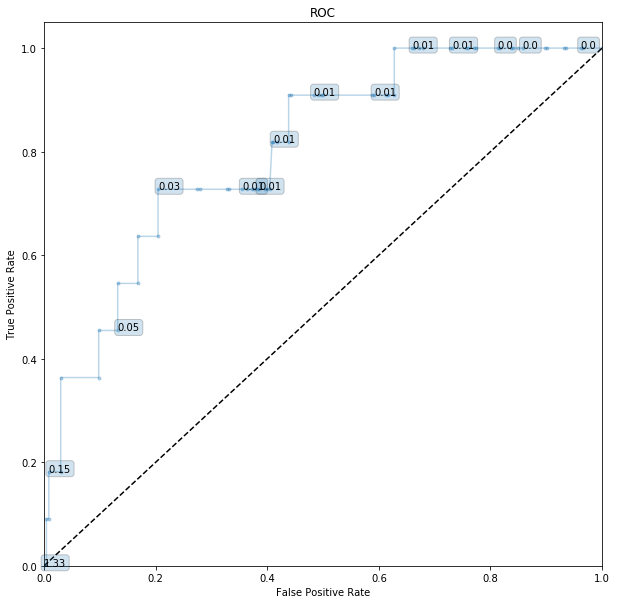

In [74]:
plt.figure(figsize=(10,10))
name = 'Logictic Regression'
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,'.-',alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
plt.plot([0,1],[0,1],'k--',)
label_kwargs = {}
label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
for k in range(0,fpr.shape[0],5):
    treshold = np.round(thresholds[k],2)
    plt.annotate(treshold,(fpr[k],tpr[k]),**label_kwargs)
ax = plt.gca()
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC')

(array([ 35.,  21.,  39.,  25.,  14.,  71.,   0.,  66.,  96., 596.]),
 array([  500.,  2325.,  4150.,  5975.,  7800.,  9625., 11450., 13275.,
        15100., 16925., 18750.]),
 <a list of 10 Patch objects>)

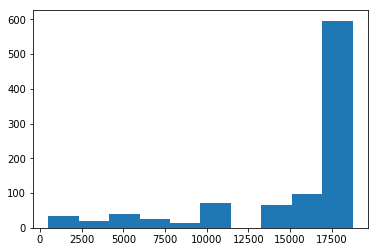

In [75]:
plt.hist(gssdata_full.income)

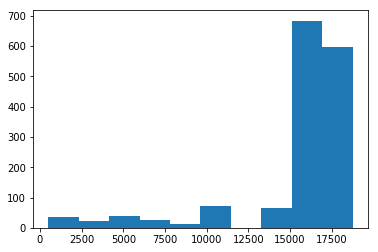

In [90]:
gssdata2 = gssdata.copy()
gssdata2['income'] = gssdata['income'].fillna(gssdata_full['income'].mean())
hit = plt.hist(gssdata2['income'])

In [91]:
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(range(gssdata2.shape[0]), train_size=0.50)
#gsstemp = gssdata_full.drop(['health','fairhealth','goodhealth','excellenthealth','sex','sexornt','partyid','race'],axis=1)
gsstemp = gssdata2[['age','educ','female','partyid_dem','partyid_rep','income']]
X_train2 = gsstemp.iloc[itrain, :]
X_test2 = gsstemp.iloc[itest, :]
y_train2 = gssdata2['poorhealth'].iloc[itrain]
y_test2 = gssdata2['poorhealth'].iloc[itest]

y_train.shape, X_train.shape, y_test.shape, X_test.shape

logit2 = LogisticRegression(C=1000000)
logit2.fit(X_train2, y_train2) 
print(logit2.score(X_test2,y_test2))
logit2.coef_

0.9394329896907216


array([[ 1.85192751e-02, -1.91500950e-01, -1.38070295e-02,
         2.85239154e-03, -9.85850548e-03, -6.68024355e-05]])

In [101]:
yhats = logit2.predict_proba(X_train2)[:,1]
confusion_matrix(y_train2 , yhats > 0.5)

array([[721,   1],
       [ 53,   0]], dtype=int64)

In [102]:
confusion_matrix(y_train2 , yhats > 0.3)

array([[719,   3],
       [ 52,   1]], dtype=int64)

In [104]:
fpr,tpr,thresholds = roc_curve(y_train2,logit2.predict_proba(X_train2)[:,1])

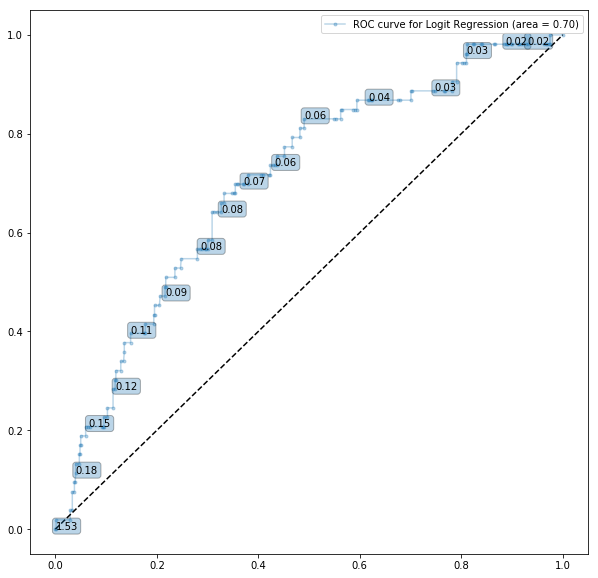

In [114]:
plt.figure(figsize=(10,10))
roc_auc = auc(fpr,tpr)
name = 'Logit Regression'
plt.plot(fpr,tpr,'.-',alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
label_kwargs = {}
label_kwargs['bbox'] = dict(boxstyle ='round,pad=0.3',alpha = 0.3)
for i in range(0,len(fpr),10):
    plt.annotate(np.round(thresholds[i],2),(fpr[i],tpr[i]),**label_kwargs)
plt.legend()
plt.plot([0,1],[0,1],'k--')